<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Complaints_HP_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

In [1]:
## for data
import pandas as pd
import numpy as np

In [2]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## for processing
import re
import nltk

In [4]:
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

In [5]:
import sklearn.metrics as metrics

In [6]:
pip install lime

     |████████████████████████████████| 275 kB 34.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=bdbcc3e6ffd43b8d26a12669a4398bdeaf02d3f29f26a02a7a6cd4f6568fa48a
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [7]:
## for explainer
from lime import lime_text

In [8]:
## for word embedding
import gensim
import gensim.downloader as gensim_api

In [9]:
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

In [10]:
pip install transformers

     |████████████████████████████████| 4.0 MB 29.7 MB/s 
     |████████████████████████████████| 6.6 MB 38.2 MB/s 
     |████████████████████████████████| 880 kB 60.4 MB/s 
     |████████████████████████████████| 77 kB 8.2 MB/s 
     |████████████████████████████████| 596 kB 78.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=54e5ae1ceafe15516072bd6e78a9dd665e83533b12f69d25350e4adc825dabd0
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [11]:
## for bert language model
import transformers

# Data

Complaints_Reshaped_May_5.csv

In [12]:
#df = pd.read_csv('/content/Complaints_Reshaped_May_5.csv',error_bad_lines=False)
df = pd.read_csv('/content/drive/MyDrive/Adelphi/Text_Analytics/Complaints_Reshaped_May_5.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
df.head(3)

,Issue,Complaint
0,Incorrect information on your report,ATTN Fraud Department : Remove fraudulent acco...
1,Incorrect information on your report,My personal background information to confirm ...
2,Incorrect information on your report,hello Ive been trying for months to get this i...


# Split the data

## Nice wasy to split the data, simply Tran/Test rather than X_train_, y_train , etc sine s=we want to pre-oprocess onlyt eh training side 

In [14]:
## split dataset
df_train, df_test = model_selection.train_test_split(df, test_size=0.2)

In [15]:
df_train.shape

(294103, 2)

In [16]:
df_train.head()

,Issue,Complaint
341585,Fraud or scam,On XX/XX/2021 I wired transferred {$20000.00} ...
65906,Problem with fraud alerts or security freezes,In XXXX 2016 XXXX XXXX closed all my checking ...
43975,Applying for a mortgage or refinancing an exis...,I was in a modification process & Wellsfargo b...
309058,Billing disputes,I signed up for a Home Depot credit card. Stup...
359286,Managing the loan or lease,I had gotten a XXXX Nissan Altima Coupe for my...


In [17]:
df_test.shape

(73526, 2)

In [18]:
df_test.head()

,Issue,Complaint
27646,Problem with a purchase or transfer,"I, the consumer am aware and have proof that B..."
91530,Struggling to pay mortgage,I applied for a loan Modification and was offe...
245974,Unexpected or other fees,PayPal closed my account for no reason and wil...
356939,"Advertising and marketing, including promotion...",I recieved an pre-approval offer for Discover ...
185910,Other transaction problem,On XX/XX/XXXX i purchased XXXX gyen on XX/XX/X...


## Assign the target values

In [19]:
## get target
y_train = df_train["Issue"].values
y_test = df_test["Issue"].values

In [20]:
y_train.shape


(294103,)

In [21]:
y_test .shape

(73526,)

# Pre Processing

In [22]:
df_train.head()

,Issue,Complaint
341585,Fraud or scam,On XX/XX/2021 I wired transferred {$20000.00} ...
65906,Problem with fraud alerts or security freezes,In XXXX 2016 XXXX XXXX closed all my checking ...
43975,Applying for a mortgage or refinancing an exis...,I was in a modification process & Wellsfargo b...
309058,Billing disputes,I signed up for a Home Depot credit card. Stup...
359286,Managing the loan or lease,I had gotten a XXXX Nissan Altima Coupe for my...


In [23]:


def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and  characters and then strip) 
    
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [24]:
pip install nltk

In [25]:

import nltk
nltk.download('stopwords')
#pip install  nltk
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [26]:
#import nltk
#nltk.download('stopwords')

In [27]:
#pip install  nltk
#import nltk
#from nltk.corpus import stopwords
#print(stopwords.words('english'))

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

In [29]:
df_train["text_clean"] = df_train["Complaint"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))


In [30]:
df_train.head()

,Issue,Complaint,text_clean
341585,Fraud or scam,On XX/XX/2021 I wired transferred {$20000.00} ...,xxxx2021 wired transferred 2000000 wells fargo...
65906,Problem with fraud alerts or security freezes,In XXXX 2016 XXXX XXXX closed all my checking ...,xxxx 2016 xxxx xxxx closed checking savings ac...
43975,Applying for a mortgage or refinancing an exis...,I was in a modification process & Wellsfargo b...,modification process wellsfargo bank purposely...
309058,Billing disputes,I signed up for a Home Depot credit card. Stup...,signed home depot credit card stupidly gave ho...
359286,Managing the loan or lease,I had gotten a XXXX Nissan Altima Coupe for my...,gotten xxxx nissan altima coupe daughter aroun...
...,...,...,...
110251,Late fee,"My credit card issuer, Citi Cards, has charged...",credit card issuer citi cards charged late fee...
53880,Problem with fraud alerts or security freezes,Made attempts to have fraud alert removed from...,made attempts fraud alert removed major credit...
74676,Struggling to repay your loan,Copy of letter sent to Navient : XXXX XXXX XXX...,copy letter sent navient xxxx xxxx xxxx xxxx x...
355540,False statements or representation,I have tried to get the company to stop report...,tried get company stop reporting incorrect inf...


In [31]:
## Count (classic BoW)  # notte 10k word limit
#vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

In [32]:
## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [33]:
classifier = naive_bayes.MultinomialNB()

We can refit the vectorizer on the corpus by giving this new set of words as input. That will produce a smaller feature matrix and a shorter vocabulary.

In [34]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])

In [35]:
corpus = df_train["text_clean"]

In [36]:
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

We skip reducing the the inpust via a Chi Sq measure

In [37]:
classifier = naive_bayes.MultinomialNB()

In [38]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])

In [39]:
## train classifier
model["classifier"].fit(X_train, y_train)

MultinomialNB()

In [42]:
df_test.head()

,Issue,Complaint
27646,Problem with a purchase or transfer,"I, the consumer am aware and have proof that B..."
91530,Struggling to pay mortgage,I applied for a loan Modification and was offe...
245974,Unexpected or other fees,PayPal closed my account for no reason and wil...
356939,"Advertising and marketing, including promotion...",I recieved an pre-approval offer for Discover ...
185910,Other transaction problem,On XX/XX/XXXX i purchased XXXX gyen on XX/XX/X...


In [44]:
## test
X_test = df_test["Complaint"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

## Metrics

In [45]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

In [46]:
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

Accuracy: 0.41
Auc: 0.89
Detail:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                  precision    recall  f1-score   support

                                                            APR or interest rate       0.00      0.00      0.00       156
                                         Account opening, closing, or management       0.34      0.37      0.35      1237
                                                                    Adding money       0.00      0.00      0.00        25
                                                                     Advertising       0.00      0.00      0.00        34
                                                       Advertising and marketing       0.00      0.00      0.00       162
                         Advertising and marketing, including promotional offers       0.47      0.42      0.45       850
                                           Advertising, marketing or disclosures       0.00      0.00      0.00         7
                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


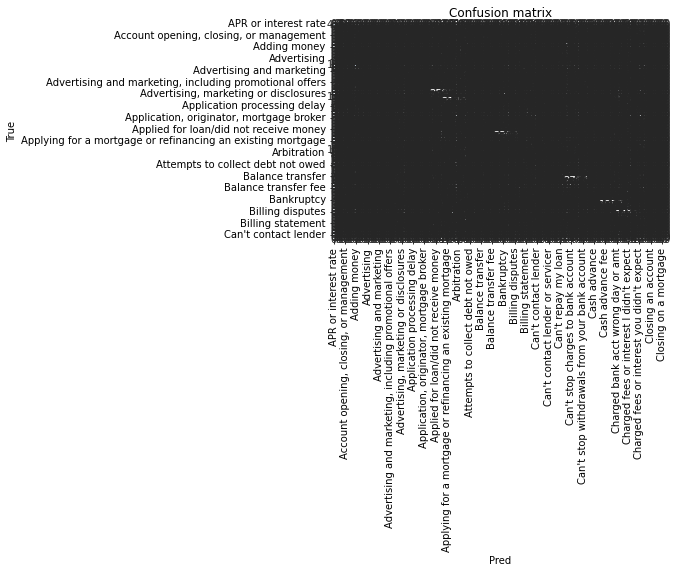

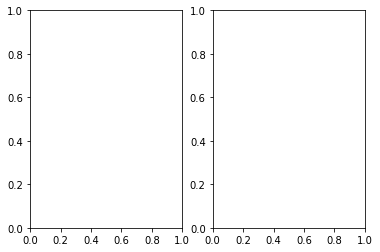

In [48]:
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)